In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [5]:
bina=ldata("tc01_data/yeast_Y2H.txt")
lit=ldata("tc01_data/yeast_LIT.txt")
prot=ldata("tc01_data/yeast_AP-MS.txt")

In [6]:
P=nx.Graph()
P.add_edges_from(prot)
B=nx.Graph()
B.add_edges_from(bina)
L=nx.Graph()
L.add_edges_from(lit)

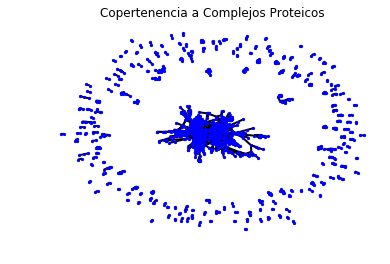

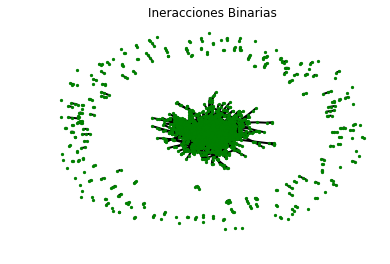

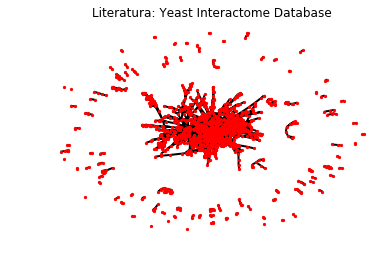

In [7]:

plt.figure(1)
plt.title("Copertenencia a Complejos Proteicos")
nx.draw(P, with_labels=False, node_color="blue", node_size=5, width=2)

plt.figure(2)
plt.title("Ineracciones Binarias")
nx.draw(B, with_labels=False,node_color="green", node_size=5, width=2)

plt.figure(3)
plt.title("Literatura: Yeast Interactome Database")
nx.draw(L, with_labels=False,node_color="red", node_size=5, width=2)


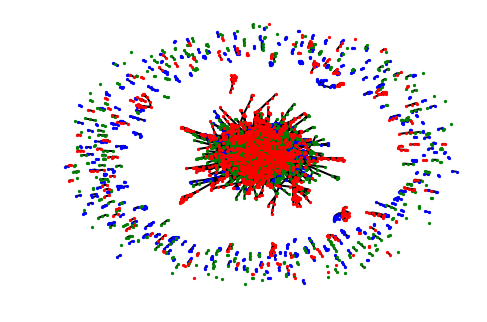

In [8]:
plt.figure(4)

P=nx.Graph()
P.add_edges_from(prot)
nx.draw(P, with_labels=False, node_color="blue", node_size=5, width=2)

B=nx.Graph()
B.add_edges_from(bina)
nx.draw(B, with_labels=False,node_color="green", node_size=5, width=2)

L=nx.Graph()
L.add_edges_from(lit)
nx.draw(L, with_labels=False,node_color="red", node_size=5, width=2)

In [9]:
G=[B,P,L]

In [10]:

N = np.empty_like(G) #i
L = np.empty_like(G) #ii
D = np.empty_like(G) #iv
G_mean = np.empty_like(G) #Enlaces que llegan a cada nodo
G_max = np.empty_like(G)
G_min  = np.empty_like(G)
dens = np.empty_like(G)
clu = np.empty_like(G)
clu_d = np.empty_like(G)
diam = np.empty_like(G)



def grados_BPL(r):
    L = len(G[r])
    degrees = np.zeros(L)#argumento = elemento de G (indice)
    for j in range(0,L): #G[r], un grafo particular de G
        degrees[j] = list(G[r].degree())[j][1] #este for #sirve para ir armando una lista de únicamente los grados por #nodo de cada grafo de G. El primer list convierte el degree
#view a una lista, conformada por pares (nombre de proteina,
#,cantidad de enlaces), el [j][1] barre toda la lista seleccionan
#do sólo la cantidad de links. Esa lista final es "degrees"
#conformada por la cantidad de nodos del grafo G[r].
    return degrees
    
for i in range(0,len(G)):
    N[i] = G[i].number_of_nodes()
    L[i] = G[i].number_of_edges()
    G_mean[i] = np.mean(grados_BPL(i)) #opero con la lista de #la función que cree
    G_max[i] = np.max(grados_BPL(i))
    G_min[i] = np.min(grados_BPL(i))
    dens[i] = nx.density(G[i])
    clu[i] = nx.average_clustering(G[i])
    clu_d[i] = nx.transitivity(G[i])
    diam[i] = nx.diameter(max(nx.connected_component_subgraphs(G[i]), key=len))

tabla = pd.DataFrame({"Red":["binarias","proteicas","Literatura"],"# de nodos":N,"# total de enlaces":L,"Grado medio":G_mean,"Grado máximo":G_max,"Grado mínimo":G_min,"Densidad de la red":dens,"Coef. de Clust. red": clu,"Sqr. Coef. de Clust. red":clu_d,"Diámetro de la red":diam})
#%%
print(tabla)



          Red # de nodos # total de enlaces Grado medio Grado máximo  \
0    binarias       2018               2930     2.90387           91   
1   proteicas       1622               9070     11.1837          127   
2  Literatura       1536               2925     3.80859           40   

  Grado mínimo Densidad de la red Coef. de Clust. red  \
0            1          0.0014397            0.046194   
1            1         0.00689927            0.554636   
2            1         0.00248117            0.292492   

  Sqr. Coef. de Clust. red Diámetro de la red  
0                0.0236142                 14  
1                  0.61859                 15  
2                 0.346193                 19  
